In [16]:
# Analyse exploratoire et nettoyage des données


In [17]:
# Importation des bibliothèques
import os
import pandas as pd  # manipuler les données sous forme de tableau (DataFrame)
import numpy as np    # effectuer des calculs numériques
import seaborn as sns # créer des graphiques pour visualiser les distributions et corrélations
import matplotlib.pyplot as plt # créer des graphiques

# Configuration de l’affichage et du style des graphiques
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [18]:
# S'assurer qu'on est bien à la racine du projet
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

print("📁 Dossier courant :", os.getcwd())


📁 Dossier courant : c:\Users\selma\Desktop\projet_seattle


In [19]:
# --- Charger le dataset Seattle 2016
csv_path = "data/2016_Building_Energy_Benchmarking.csv"

try:
    df = pd.read_csv(csv_path)
except:
    try:
        df = pd.read_csv(csv_path, sep=";")
    except:
        df = pd.read_csv(csv_path, sep="\t")

print("✅ Données chargées avec succès :", df.shape)
display(df.head(5))


✅ Données chargées avec succès : (3376, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [20]:
# --- Informations générales sur le dataset
print("\n🧾 Noms des colonnes :", df.columns.tolist())
print("\n📐 Dimensions :", df.shape)
print("\n📊 Types de données :")
print(df.dtypes.head())



🧾 Noms des colonnes : ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

📐 Dimensions : (3376, 46)

📊 Ty

In [21]:
# --- Statistiques descriptives
display(df.describe())


,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [22]:
# --- Valeurs manquantes
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\n🔍 Colonnes avec valeurs manquantes :")
display(missing.head(10))



🔍 Colonnes avec valeurs manquantes :


Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
dtype: int64

In [23]:
# --- Filtrer les bâtiments non résidentiels
if "BuildingType" in df.columns:
    print("\n🏢 Valeurs uniques de BuildingType :", df["BuildingType"].unique())
    before = df.shape[0]
    df = df[df["BuildingType"].str.contains("Nonresidential", case=False, na=False)]
    print(f"✅ Bâtiments non résidentiels conservés : {df.shape[0]} / {before}")
else:
    print("⚠️ Colonne BuildingType non trouvée, aucun filtrage appliqué.")



🏢 Valeurs uniques de BuildingType : ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']
✅ Bâtiments non résidentiels conservés : 1546 / 3376


In [24]:
# --- Nettoyage des colonnes problématiques
for col in ["Outlier", "DefaultData", "ComplianceStatus"]:
    if col in df.columns:
        print(f"\n🧹 Nettoyage de la colonne : {col}")
        print("Valeurs uniques :", df[col].unique())

        if col == "Outlier":
            df = df[~df[col].isin(["Yes", "TRUE", True])]
        elif col == "DefaultData":
            df = df[~df[col].isin(["Yes", "TRUE", True])]
        elif col == "ComplianceStatus":
            df = df[df[col].isin(["Compliant", "Compliant: Exempted", np.nan])]

        df.drop(columns=[col], inplace=True)

print("\n✅ Données après nettoyage :", df.shape)



🧹 Nettoyage de la colonne : Outlier
Valeurs uniques : [nan 'High outlier' 'Low outlier']

🧹 Nettoyage de la colonne : DefaultData
Valeurs uniques : [False  True]

🧹 Nettoyage de la colonne : ComplianceStatus
Valeurs uniques : ['Compliant' 'Non-Compliant' 'Missing Data']

✅ Données après nettoyage : (1514, 43)


In [25]:
# --- Suppression des doublons
before = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"♻️ Doublons supprimés : {before - df.shape[0]}")


♻️ Doublons supprimés : 0


In [26]:
# --- Identifier colonnes numériques et catégorielles
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()

print("\n🔢 Colonnes numériques :", numeric_cols[:10])
print("🔤 Colonnes catégorielles :", cat_cols[:10])



🔢 Colonnes numériques : ['OSEBuildingID', 'DataYear', 'ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal']
🔤 Colonnes catégorielles : ['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType']


In [27]:
# --- Définir les cibles principales
energy_cols = [col for col in df.columns if "Energy" in col or "SiteEnergyUse" in col]
emission_cols = [col for col in df.columns if "GHG" in col or "Emission" in col]

target_energy = energy_cols[0] if energy_cols else None
target_emission = emission_cols[0] if emission_cols else None

print("\n Target consommation :", target_energy)
print(" Target émission :", target_emission)



 Target consommation : SiteEnergyUse(kBtu)
 Target émission : TotalGHGEmissions


In [28]:
# --- Vérification du nombre de lignes
print("\n📏 Nombre de lignes finales :", df.shape[0])
if df.shape[0] < 100:
    print(" ATTENTION : très peu de lignes restantes, vérifie les filtres !")



📏 Nombre de lignes finales : 1514


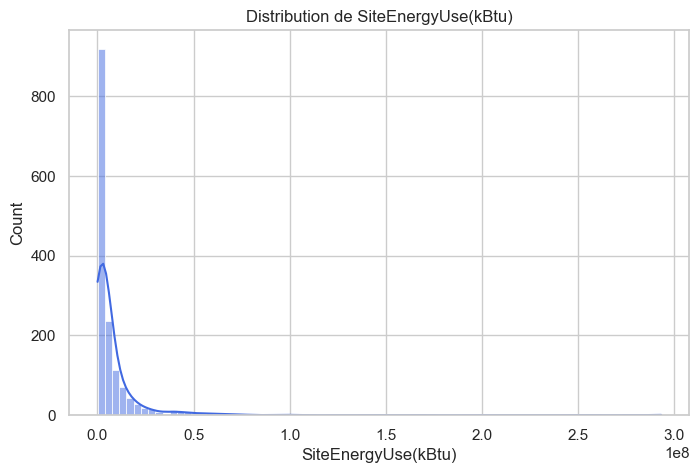

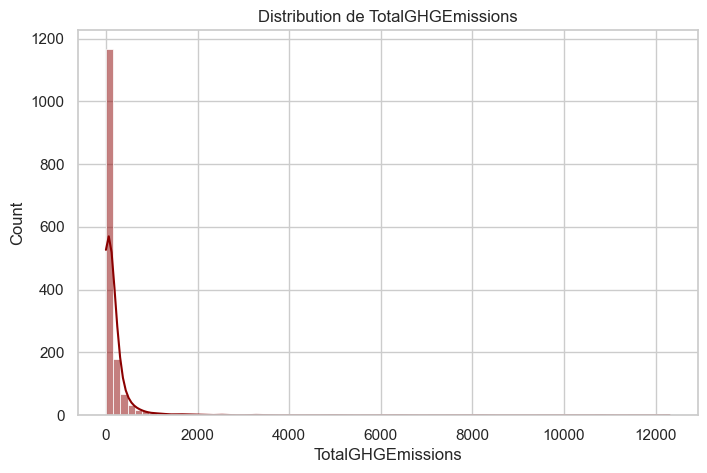

In [29]:
# --- Distribution des cibles principales
if target_energy in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[target_energy], kde=True, color="royalblue")
    plt.title(f"Distribution de {target_energy}")
    plt.show()

if target_emission in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[target_emission], kde=True, color="darkred")
    plt.title(f"Distribution de {target_emission}")
    plt.show()


In [30]:
# --- Sauvegarde du dataset nettoyé
output_path = "data/data_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\n Dataset nettoyé sauvegardé dans {output_path}")
print(" Dimensions finales :", df.shape)



 Dataset nettoyé sauvegardé dans data/data_cleaned.csv
 Dimensions finales : (1514, 43)
